In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf

In [3]:
conn = sqlite3.connect(r'C:\Users\Britt\Desktop\Data Analytics\SQL\Databases\sqlite-sakila.db')

In [4]:
df1 = pd.read_sql_query('''SELECT DISTINCT f.film_id, 
f.title, 
c.name as category, 
(a.first_name ||" "|| a.last_name) as actor_name, 
f.rental_rate, 
f.rental_duration, 
f.replacement_cost, 
f.rating, 
f.release_year,  
f.special_features, 
l.name as 'Language', 
f."length", 
i.inventory_id, 
s.store_id
FROM film f 
LEFT JOIN film_category fc on fc.film_id = f.film_id 
LEFT JOIN category c on c.category_id = fc.category_id 
LEFT JOIN film_actor fa on fa.film_id = f.film_id 
LEFT JOIN actor a on a.actor_id = fa.actor_id
LEFT JOIN "language" l on l.language_id = f.language_id
LEFT JOIN inventory i on i.film_id = f.film_id 
LEFT JOIN store s on s.store_id = i.store_id''', conn)

In [5]:
df2 = pd.read_sql_query('''SELECT DISTINCT r.rental_id, 
r.rental_date, 
r.return_date, 
p.amount as payment, 
p.payment_date, 
c.customer_id, 
(c.first_name ||" "|| c.last_name) as customer_name, 
c.create_date as customer_joined, 
c.active as customer_active,
(s2.first_name ||" "|| s2.last_name) as staff_name, 
s2.staff_id, 
s.manager_staff_id, 
a.district, 
c2.city, 
c3.country, 
s.store_id 
FROM rental r 
LEFT JOIN payment p on p.rental_id = r.rental_id 
LEFT JOIN customer c on c.customer_id = p.customer_id 
LEFT JOIN store s on s.store_id = c.store_id
LEFT JOIN staff s2 on s2.staff_id = s.manager_staff_id 
LEFT JOIN address a on a.address_id = s2.address_id
LEFT JOIN city c2 on c2.city_id = a.city_id 
LEFT JOIN country c3 on c3.country_id = c2.country_id''', conn)

In [6]:
df3 = pd.read_sql_query('''SELECT DISTINCT r.rental_id, 
f.film_id, 
f.title, 
c.name as category, 
c.category_id,
f.rental_rate, 
r.rental_date, 
r.return_date, 
f.rental_duration, 
p.amount as payment, 
p.payment_date, 
c2.customer_id, 
(c2.first_name ||" "|| c2.last_name) as customer_name, 
c2.create_date as customer_joined, 
c2.active as customer_active, 
(s2.first_name ||" "|| s2.last_name) as staff_name, 
s2.staff_id, 
s.manager_staff_id, 
a2.district, 
c3.city, 
c4.country, 
s.store_id, 
(a.first_name ||" "|| a.last_name) as actor_name, 
f.rating, 
f.release_year, 
f.special_features, 
l.name as 'language', 
f."length", 
f.replacement_cost, 
i.inventory_id  
FROM rental r 
LEFT JOIN inventory i on i.inventory_id = r.inventory_id 
LEFT JOIN film f on f.film_id = i.film_id  
LEFT JOIN film_category fc on fc.film_id = f.film_id 
LEFT JOIN category c on c.category_id = fc.category_id 
LEFT JOIN film_actor fa on fa.film_id = f.film_id 
LEFT JOIN actor a on a.actor_id = fa.actor_id
LEFT JOIN "language" l on l.language_id = f.language_id
LEFT JOIN payment p on p.rental_id = r.rental_id 
LEFT JOIN customer c2 on c2.customer_id = p.customer_id 
LEFT JOIN store s on s.store_id = c2.store_id
LEFT JOIN staff s2 on s2.staff_id = s.manager_staff_id 
LEFT JOIN address a2 on a2.address_id = s2.address_id
LEFT JOIN city c3 on c3.city_id = a2.city_id 
LEFT JOIN country c4 on c4.country_id = c3.country_id''', conn)

In [7]:
conn.close()

Making copies of the dataframes

In [8]:
film_df1 = df1.copy()

In [9]:
store_df2 = df2.copy()

In [10]:
rental_df3 = df3.copy()

In [11]:
film_df1

,film_id,title,category,actor_name,rental_rate,rental_duration,replacement_cost,rating,release_year,special_features,Language,length,inventory_id,store_id
0,1,ACADEMY DINOSAUR,Documentary,PENELOPE GUINESS,0.99,6,20.99,PG,2006,"Deleted Scenes,Behind the Scenes",English,86,1.0,1.0
1,1,ACADEMY DINOSAUR,Documentary,PENELOPE GUINESS,0.99,6,20.99,PG,2006,"Deleted Scenes,Behind the Scenes",English,86,2.0,1.0
2,1,ACADEMY DINOSAUR,Documentary,PENELOPE GUINESS,0.99,6,20.99,PG,2006,"Deleted Scenes,Behind the Scenes",English,86,3.0,1.0
3,1,ACADEMY DINOSAUR,Documentary,PENELOPE GUINESS,0.99,6,20.99,PG,2006,"Deleted Scenes,Behind the Scenes",English,86,4.0,1.0
4,1,ACADEMY DINOSAUR,Documentary,PENELOPE GUINESS,0.99,6,20.99,PG,2006,"Deleted Scenes,Behind the Scenes",English,86,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25367,1000,ZORRO ARK,Comedy,LISA MONROE,4.99,3,18.99,NC-17,2006,"Trailers,Commentaries,Behind the Scenes",English,50,4577.0,1.0
25368,1000,ZORRO ARK,Comedy,LISA MONROE,4.99,3,18.99,NC-17,2006,"Trailers,Commentaries,Behind the Scenes",English,50,4578.0,2.0
25369,1000,ZORRO ARK,Comedy,LISA MONROE,4.99,3,18.99,NC-17,2006,"Trailers,Commentaries,Behind the Scenes",English,50,4579.0,2.0
25370,1000,ZORRO ARK,Comedy,LISA MONROE,4.99,3,18.99,NC-17,2006,"Trailers,Commentaries,Behind the Scenes",English,50,4580.0,2.0


In [12]:
store_df2

,rental_id,rental_date,return_date,payment,payment_date,customer_id,customer_name,customer_joined,customer_active,staff_name,staff_id,manager_staff_id,district,city,country,store_id
0,1,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,2.99,2005-05-24 22:53:30.000,130,CHARLOTTE HUNTER,2006-02-14 22:04:36.000,1,Mike Hillyer,1,1,,Lethbridge,Canada,1
1,2,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,2.99,2005-05-24 22:54:33.000,459,TOMMY COLLAZO,2006-02-14 22:04:37.000,1,Mike Hillyer,1,1,,Lethbridge,Canada,1
2,3,2005-05-24 23:03:39.000,2005-06-01 22:12:39.000,3.99,2005-05-24 23:03:39.000,408,MANUEL MURRELL,2006-02-14 22:04:37.000,1,Mike Hillyer,1,1,,Lethbridge,Canada,1
3,4,2005-05-24 23:04:41.000,2005-06-03 01:43:41.000,4.99,2005-05-24 23:04:41.000,333,ANDREW PURDY,2006-02-14 22:04:37.000,1,Jon Stephens,2,2,,Woodridge,Australia,2
4,5,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,6.99,2005-05-24 23:05:21.000,222,DELORES HANSEN,2006-02-14 22:04:36.000,1,Jon Stephens,2,2,,Woodridge,Australia,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,2005-08-25 23:54:26.000,0.99,2005-08-23 22:25:26.000,14,BETTY WHITE,2006-02-14 22:04:36.000,1,Jon Stephens,2,2,,Woodridge,Australia,2
16040,16046,2005-08-23 22:26:47.000,2005-08-27 18:02:47.000,0.99,2005-08-23 22:26:47.000,74,DENISE KELLY,2006-02-14 22:04:36.000,1,Mike Hillyer,1,1,,Lethbridge,Canada,1
16041,16047,2005-08-23 22:42:48.000,2005-08-25 02:48:48.000,0.99,2005-08-23 22:42:48.000,114,GRACE ELLIS,2006-02-14 22:04:36.000,1,Jon Stephens,2,2,,Woodridge,Australia,2
16042,16048,2005-08-23 22:43:07.000,2005-08-31 21:33:07.000,8.99,2005-08-23 22:43:07.000,103,GLADYS HAMILTON,2006-02-14 22:04:36.000,1,Mike Hillyer,1,1,,Lethbridge,Canada,1


In [13]:
rental_df3

,rental_id,film_id,title,category,category_id,rental_rate,rental_date,return_date,rental_duration,payment,...,country,store_id,actor_name,rating,release_year,special_features,language,length,replacement_cost,inventory_id
0,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,FRED COSTNER,G,2006,Trailers,English,148,21.99,367
1,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,ALAN DREYFUSS,G,2006,Trailers,English,148,21.99,367
2,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,BURT TEMPLE,G,2006,Trailers,English,148,21.99,367
3,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,THORA TEMPLE,G,2006,Trailers,English,148,21.99,367
4,2,333,FREAKY POCUS,Music,12,2.99,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,7,2.99,...,Canada,1,TOM MIRANDA,R,2006,"Trailers,Behind the Scenes",English,126,16.99,1525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88015,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,SISSY SOBIESKI,G,2006,Trailers,English,105,25.99,2666
88016,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,TIM HACKMAN,G,2006,Trailers,English,105,25.99,2666
88017,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,CHRISTIAN NEESON,G,2006,Trailers,English,105,25.99,2666
88018,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,MATTHEW LEIGH,G,2006,Trailers,English,105,25.99,2666


Data Quality Checks

In [14]:
rental_df3.isnull().sum()

rental_id              0
film_id                0
title                  0
category               0
category_id            0
rental_rate            0
rental_date            0
return_date         1009
rental_duration        0
payment                0
payment_date           0
customer_id            0
customer_name          0
customer_joined        0
customer_active        0
staff_name             0
staff_id               0
manager_staff_id       0
district               0
city                   0
country                0
store_id               0
actor_name            40
rating                 0
release_year           0
special_features       0
language               0
length                 0
replacement_cost       0
inventory_id           0
dtype: int64

In [15]:
rental_df3.dtypes

rental_id             int64
film_id               int64
title                object
category             object
category_id           int64
rental_rate         float64
rental_date          object
return_date          object
rental_duration       int64
payment             float64
payment_date         object
customer_id           int64
customer_name        object
customer_joined      object
customer_active      object
staff_name           object
staff_id              int64
manager_staff_id      int64
district             object
city                 object
country              object
store_id              int64
actor_name           object
rating               object
release_year         object
special_features     object
language             object
length                int64
replacement_cost    float64
inventory_id          int64
dtype: object

In [16]:
rental_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88020 entries, 0 to 88019
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         88020 non-null  int64  
 1   film_id           88020 non-null  int64  
 2   title             88020 non-null  object 
 3   category          88020 non-null  object 
 4   category_id       88020 non-null  int64  
 5   rental_rate       88020 non-null  float64
 6   rental_date       88020 non-null  object 
 7   return_date       87011 non-null  object 
 8   rental_duration   88020 non-null  int64  
 9   payment           88020 non-null  float64
 10  payment_date      88020 non-null  object 
 11  customer_id       88020 non-null  int64  
 12  customer_name     88020 non-null  object 
 13  customer_joined   88020 non-null  object 
 14  customer_active   88020 non-null  object 
 15  staff_name        88020 non-null  object 
 16  staff_id          88020 non-null  int64 

In [17]:
rental_df3.duplicated().sum()

0

In [18]:
#replacing null values with 'missing'
rental_df3.fillna('missing')

,rental_id,film_id,title,category,category_id,rental_rate,rental_date,return_date,rental_duration,payment,...,country,store_id,actor_name,rating,release_year,special_features,language,length,replacement_cost,inventory_id
0,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,FRED COSTNER,G,2006,Trailers,English,148,21.99,367
1,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,ALAN DREYFUSS,G,2006,Trailers,English,148,21.99,367
2,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,BURT TEMPLE,G,2006,Trailers,English,148,21.99,367
3,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,Canada,1,THORA TEMPLE,G,2006,Trailers,English,148,21.99,367
4,2,333,FREAKY POCUS,Music,12,2.99,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,7,2.99,...,Canada,1,TOM MIRANDA,R,2006,"Trailers,Behind the Scenes",English,126,16.99,1525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88015,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,SISSY SOBIESKI,G,2006,Trailers,English,105,25.99,2666
88016,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,TIM HACKMAN,G,2006,Trailers,English,105,25.99,2666
88017,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,CHRISTIAN NEESON,G,2006,Trailers,English,105,25.99,2666
88018,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,Canada,1,MATTHEW LEIGH,G,2006,Trailers,English,105,25.99,2666


In [19]:
rental_df3.sample(50)

,rental_id,film_id,title,category,category_id,rental_rate,rental_date,return_date,rental_duration,payment,...,country,store_id,actor_name,rating,release_year,special_features,language,length,replacement_cost,inventory_id
53344,9737,375,GRAIL FRANKENSTEIN,Action,1,2.99,2005-07-31 08:59:18.000,2005-08-03 12:19:18.000,4,2.99,...,Australia,2,DARYL WAHLBERG,NC-17,2006,"Commentaries,Deleted Scenes,Behind the Scenes",English,85,17.99,1720
26760,4885,98,BRIGHT ENCOUNTERS,Drama,7,4.99,2005-07-08 19:51:17.000,2005-07-12 16:02:17.000,4,4.99,...,Australia,2,MERYL ALLEN,PG-13,2006,Trailers,English,73,12.99,442
2362,439,78,BLACKOUT PRIVATE,Animation,2,2.99,2005-05-27 17:54:48.000,2005-06-02 23:01:48.000,7,2.99,...,Australia,2,CARY MCCONAUGHEY,PG,2006,"Trailers,Deleted Scenes",English,85,12.99,354
81937,14938,90,BOULEVARD MOB,New,13,0.99,2005-08-22 05:52:39.000,2005-08-31 11:43:39.000,3,6.99,...,Australia,2,AUDREY OLIVIER,R,2006,Trailers,English,63,11.99,408
63468,11583,26,ANNIE IDENTITY,Sci-Fi,14,0.99,2005-08-17 02:08:13.000,2005-08-20 23:13:13.000,3,0.99,...,Australia,2,GRETA KEITEL,G,2006,"Commentaries,Deleted Scenes",English,86,15.99,133
54404,9934,546,MADRE GABLES,Games,10,2.99,2005-07-31 15:25:26.000,2005-08-05 17:13:26.000,7,2.99,...,Canada,1,TOM MIRANDA,PG-13,2006,"Trailers,Commentaries,Deleted Scenes",English,98,27.99,2492
78462,14317,453,IMAGE PRINCESS,Sports,15,2.99,2005-08-21 08:00:40.000,2005-08-27 06:52:40.000,3,5.99,...,Canada,1,BURT DUKAKIS,PG-13,2006,"Trailers,Commentaries,Deleted Scenes",English,178,17.99,2090
5194,960,429,HONEY TIES,Sports,15,0.99,2005-05-30 18:13:23.000,2005-06-04 00:12:23.000,3,2.99,...,Canada,1,JULIANNE DENCH,R,2006,"Trailers,Commentaries,Deleted Scenes",English,84,29.99,1966
79482,14501,785,SHAWSHANK BUBBLE,Travel,16,4.99,2005-08-21 14:14:38.000,2005-08-25 17:58:38.000,6,4.99,...,Australia,2,IAN TANDY,PG,2006,"Commentaries,Deleted Scenes",English,80,20.99,3588
74529,13599,733,RIVER OUTLAW,Sports,15,0.99,2005-08-20 06:00:03.000,2005-08-29 07:56:03.000,4,5.99,...,Australia,2,GARY PHOENIX,PG-13,2006,Commentaries,English,149,29.99,3333


In [20]:
#replacing the 'none' listed as null values 
rental_df3['return_date'] = rental_df3['return_date'].replace(['None'], 'Missing')

In [21]:
rental_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88020 entries, 0 to 88019
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         88020 non-null  int64  
 1   film_id           88020 non-null  int64  
 2   title             88020 non-null  object 
 3   category          88020 non-null  object 
 4   category_id       88020 non-null  int64  
 5   rental_rate       88020 non-null  float64
 6   rental_date       88020 non-null  object 
 7   return_date       87011 non-null  object 
 8   rental_duration   88020 non-null  int64  
 9   payment           88020 non-null  float64
 10  payment_date      88020 non-null  object 
 11  customer_id       88020 non-null  int64  
 12  customer_name     88020 non-null  object 
 13  customer_joined   88020 non-null  object 
 14  customer_active   88020 non-null  object 
 15  staff_name        88020 non-null  object 
 16  staff_id          88020 non-null  int64 

In [22]:
#finding the unique values of film titles
film_titles = pd.DataFrame(rental_df3['title'].unique())

In [23]:
film_titles

,0
0,BLANKET BEVERLY
1,FREAKY POCUS
2,GRADUATE LORD
3,LOVE SUICIDES
4,IDOLS SNATCHERS
...,...
953,JERSEY SASSY
954,VERTIGO NORTHWEST
955,TRAIN BUNCH
956,HARDLY ROBBERS


Aggregate Functions

In [24]:
#grouping sales by associate to see what each associate has brought in for sales
staff_sales = pd.DataFrame(rental_df3.groupby(['staff_id'])['payment'].sum())
staff_sales

,payment
staff_id,
1,201371.19
2,166387.48


In [25]:
#verifying that my total in staff_sales matches the total from the table
rental_df3['payment'].agg(['sum'])

sum    367758.67
Name: payment, dtype: float64

In [26]:
#getting the average of the payment column
rental_df3['payment'].agg(['mean'])

mean    4.178126
Name: payment, dtype: float64

In [27]:
#Pass the total rental payments or sales per sales associate and return a value of “Above Average”, “Average”, “Below Average”, or “No Sales”

#if 'payment' is > 4.18 print 'Above Average'
#elif 'payment' is = 4.18 print 'Average'
#elif 'payment' is < 4.18 print 'Below Average'
#else print 'No Sales'

rental_df3.loc[rental_df3['payment'] > 4.18, 'sales_average'] = 'Above Average'
rental_df3.loc[rental_df3['payment'] == 4.18, 'sales_average'] = 'Average'
rental_df3.loc[rental_df3['payment'] < 4.18, 'sales_average'] = 'Below Average'
rental_df3.loc[rental_df3['payment'] == 0.00, 'sales_average'] = 'No Sales'
rental_df3

,rental_id,film_id,title,category,category_id,rental_rate,rental_date,return_date,rental_duration,payment,...,store_id,actor_name,rating,release_year,special_features,language,length,replacement_cost,inventory_id,sales_average
0,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,1,FRED COSTNER,G,2006,Trailers,English,148,21.99,367,Below Average
1,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,1,ALAN DREYFUSS,G,2006,Trailers,English,148,21.99,367,Below Average
2,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,1,BURT TEMPLE,G,2006,Trailers,English,148,21.99,367,Below Average
3,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,1,THORA TEMPLE,G,2006,Trailers,English,148,21.99,367,Below Average
4,2,333,FREAKY POCUS,Music,12,2.99,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,7,2.99,...,1,TOM MIRANDA,R,2006,"Trailers,Behind the Scenes",English,126,16.99,1525,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88015,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,1,SISSY SOBIESKI,G,2006,Trailers,English,105,25.99,2666,Below Average
88016,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,1,TIM HACKMAN,G,2006,Trailers,English,105,25.99,2666,Below Average
88017,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,1,CHRISTIAN NEESON,G,2006,Trailers,English,105,25.99,2666,Below Average
88018,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,1,MATTHEW LEIGH,G,2006,Trailers,English,105,25.99,2666,Below Average


In [28]:
#grouping the sales by film category
film_genre_sales = pd.DataFrame(rental_df3.groupby('category')['payment'].sum()).reset_index()
film_genre_sales.rename(columns = {'payment':'total_sales'}, inplace = True)
film_genre_sales

,category,total_sales
0,Action,23882.67
1,Animation,26945.80
2,Children,20927.90
3,Classics,19521.02
4,Comedy,21688.33
5,Documentary,23580.23
6,Drama,25978.48
7,Family,21111.04
8,Foreign,23947.38
9,Games,20008.58


In [29]:
#adding a column to show if a return date was listed to help determine if a replacement film was needed and the costs of that
def returned (rental_df3):
    if (rental_df3['return_date'] == 'none'):
        return 'not returned'
    else:
        return 'returned'

rental_df3['film_returned'] = rental_df3.apply(returned, axis=1)

In [30]:
rental_df3

,rental_id,film_id,title,category,category_id,rental_rate,rental_date,return_date,rental_duration,payment,...,actor_name,rating,release_year,special_features,language,length,replacement_cost,inventory_id,sales_average,film_returned
0,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,FRED COSTNER,G,2006,Trailers,English,148,21.99,367,Below Average,returned
1,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,ALAN DREYFUSS,G,2006,Trailers,English,148,21.99,367,Below Average,returned
2,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,BURT TEMPLE,G,2006,Trailers,English,148,21.99,367,Below Average,returned
3,1,80,BLANKET BEVERLY,Family,8,2.99,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,7,2.99,...,THORA TEMPLE,G,2006,Trailers,English,148,21.99,367,Below Average,returned
4,2,333,FREAKY POCUS,Music,12,2.99,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,7,2.99,...,TOM MIRANDA,R,2006,"Trailers,Behind the Scenes",English,126,16.99,1525,Below Average,returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88015,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,SISSY SOBIESKI,G,2006,Trailers,English,105,25.99,2666,Below Average,returned
88016,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,TIM HACKMAN,G,2006,Trailers,English,105,25.99,2666,Below Average,returned
88017,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,CHRISTIAN NEESON,G,2006,Trailers,English,105,25.99,2666,Below Average,returned
88018,16049,585,MOB DUFFEL,Drama,7,0.99,2005-08-23 22:50:12.000,2005-08-30 01:01:12.000,4,3.99,...,MATTHEW LEIGH,G,2006,Trailers,English,105,25.99,2666,Below Average,returned


In [31]:
#store sales
store_sales = pd.DataFrame(rental_df3.groupby('store_id')['payment'].sum()).reset_index()
store_sales.rename(columns = {'payment':'store_sales'}, inplace = True)
store_sales

,store_id,store_sales
0,1,201371.19
1,2,166387.48


In [32]:
#active customer id count - 
active_customers = pd.DataFrame(rental_df3.groupby('store_id')['customer_active'].count()).reset_index()
active_customers.rename(columns = {'customer_active':'active_customer_count'}, inplace = True)
active_customers

,store_id,active_customer_count
0,1,47977
1,2,40043


In [33]:
#grouping the count of films by category
film_count = pd.DataFrame(rental_df3.groupby('category')['film_id'].count()).reset_index()
film_count.rename(columns = {'film_id':'total_films'}, inplace = True)
film_count
#this isn't 100% accurate since the films are listed multiple times with each actors name

,category,total_films
0,Action,6307
1,Animation,6600
2,Children,5510
3,Classics,5088
4,Comedy,4662
5,Documentary,6188
6,Drama,5946
7,Family,5615
8,Foreign,5559
9,Games,4552


In [34]:
#trying to see if using the category_id would give a more accurate film count
film_category_count = pd.DataFrame(rental_df3.groupby('category')['category_id'].count()).reset_index()
film_category_count.rename(columns = {'category_id':'films_in_category'}, inplace = True)
film_category_count

,category,films_in_category
0,Action,6307
1,Animation,6600
2,Children,5510
3,Classics,5088
4,Comedy,4662
5,Documentary,6188
6,Drama,5946
7,Family,5615
8,Foreign,5559
9,Games,4552


In [35]:
#grouping customers to see count of total purchases made
customer_sales = pd.DataFrame(rental_df3.groupby('customer_name')['rental_id'].count()).reset_index()
customer_sales.rename(columns = {'rental_id':'total_purchases'}, inplace = True)
customer_sales

,customer_name,total_purchases
0,AARON SELBY,108
1,ADAM GOOCH,136
2,ADRIAN CLARY,98
3,AGNES BISHOP,118
4,ALAN KAHN,138
...,...,...
594,WILLIE MARKHAM,156
595,WILMA RICHARDS,109
596,YOLANDA WEAVER,141
597,YVONNE WATKINS,122


Exporting my data to CSV

In [36]:
rental_df3.to_csv('Tableau_Proj2.csv')

Building out charts

Text(0.5, 1.0, 'Film Category Sales')

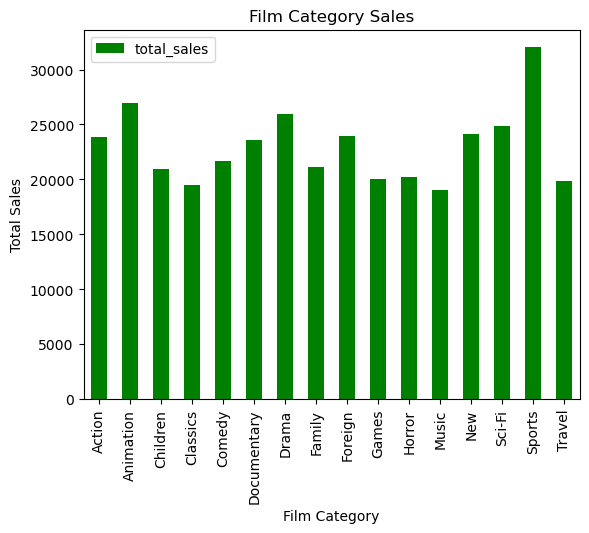

In [37]:
#chart 1 - comparing film sales by category
film_genre_sales.plot.bar(x='category',y='total_sales',color = 'green')
plt.xlabel('Film Category')
plt.ylabel('Total Sales')
plt.title('Film Category Sales')

Text(0.5, 1.0, 'Sales by Store')

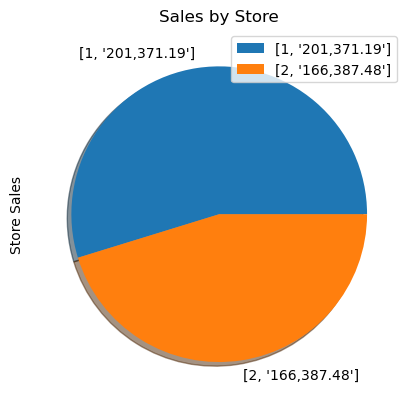

In [38]:
#chart 2 - comparing sales by store
store_sales.plot.pie(y='store_sales',labels = [[1,'201,371.19'],[2,'166,387.48']], shadow = True)
plt.ylabel('Store Sales')
plt.title('Sales by Store')

Text(0.5, 1.0, 'Active Customers by Store')

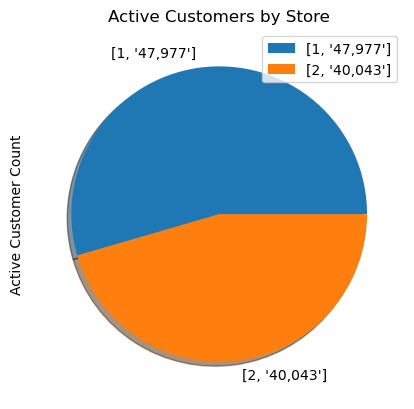

In [39]:
#chart 3 - comparing active customer count by store
active_customers.plot.pie(y='active_customer_count',labels = [[1,'47,977'],[2,'40,043']], shadow = True)
plt.ylabel('Active Customer Count')
plt.title('Active Customers by Store')

Text(0.5, 1.0, 'Total Films by Category')

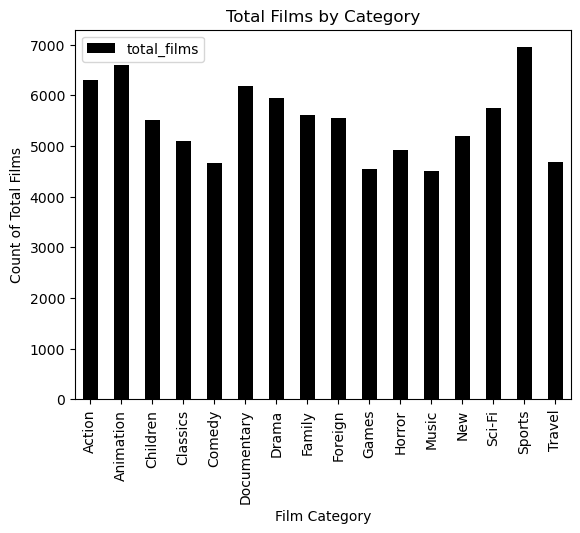

In [40]:
#chart 4 - film count by category
film_count.plot.bar(x='category',y='total_films',color = 'black')
plt.xlabel('Film Category')
plt.ylabel('Count of Total Films')
plt.title('Total Films by Category')